## Testing the limits of the dispersion relation equations

here i will be comparing both the dispersion relation equations to see in what limit i can approximate as a linear eq

In [117]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import math

In [118]:
k = np.linspace(0, 1000, 1001)

In [119]:
y = 0.072
g = 9.8

In [120]:
df1 = pd. DataFrame(k, columns=['k (1/m)']) 
df1.head(5)

,k (1/m)
0,0.0
1,1.0
2,2.0
3,3.0
4,4.0


In [135]:
def w2(k):
    w = (g*k + y*k**3)*np.tanh(0.02*k)
    return w

In [136]:
df1["w^2 (hz^2)"] = w2(df1["k (1/m)"])
df1["k^3 (1/m^3)"] = df1["k (1/m)"]**3
df1

,k (1/m),w^2 (hz^2),k^3 (1/m^3)
0,0.0,0.000000e+00,0.000000e+00
1,1.0,1.974137e-01,1.000000e+00
2,2.0,8.066099e-01,8.000000e+00
3,3.0,1.878386e+00,2.700000e+01
4,4.0,3.497183e+00,6.400000e+01
...,...,...,...
996,996.0,7.114921e+07,9.880479e+08
997,997.0,7.136371e+07,9.910270e+08
998,998.0,7.157864e+07,9.940120e+08
999,999.0,7.179401e+07,9.970030e+08


now do the same for the approximated eq

In [137]:
df2 = pd. DataFrame(k, columns=['k (1/m)']) 
df2.head(5)

,k (1/m)
0,0.0
1,1.0
2,2.0
3,3.0
4,4.0


In [138]:
def w2_(k):
    return y * k**3

In [139]:
df2["w^2 (hz^2)"] = w2_(df2["k (1/m)"])
df2["k^3 (1/m^3)"] = df2["k (1/m)"]**3
df2

,k (1/m),w^2 (hz^2),k^3 (1/m^3)
0,0.0,0.000000e+00,0.000000e+00
1,1.0,7.200000e-02,1.000000e+00
2,2.0,5.760000e-01,8.000000e+00
3,3.0,1.944000e+00,2.700000e+01
4,4.0,4.608000e+00,6.400000e+01
...,...,...,...
996,996.0,7.113945e+07,9.880479e+08
997,997.0,7.135394e+07,9.910270e+08
998,998.0,7.156886e+07,9.940120e+08
999,999.0,7.178422e+07,9.970030e+08


now plot

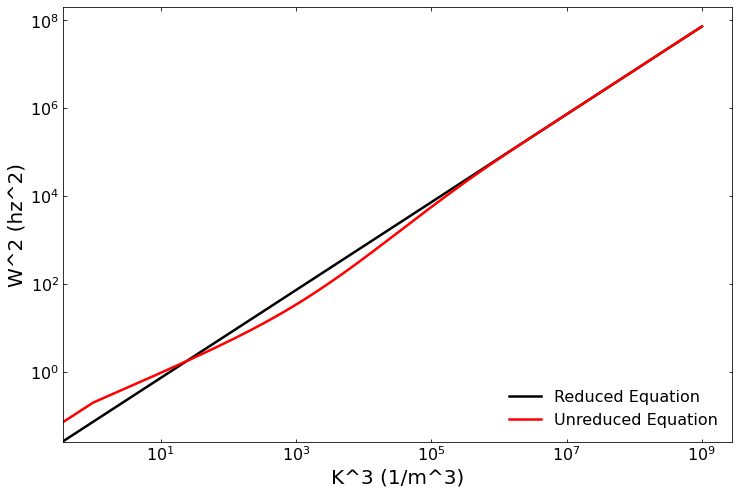

In [238]:
plt.rcParams['font.size'] = '16'

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

ax.plot(df2["k^3 (1/m^3)"],df2["w^2 (hz^2)"],'k-',markersize=3, lw = 2.5, linestyle = ("-"),label = "Reduced Equation")
ax.plot(df1["k^3 (1/m^3)"],df1["w^2 (hz^2)"],'r-',markersize=3, lw = 2.5, linestyle = ("-"),label = "Unreduced Equation")


ax.set_ylabel('W^2 (hz^2)',fontsize=20)
ax.set_xlabel('K^3 (1/m^3)',fontsize=20)

ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

ax.set_yscale("log")
ax.set_xscale("log")

ax.tick_params(axis="y", direction="in")
ax.tick_params(axis="x", direction="in")

plt.legend(loc = "lower right",frameon=False)
plt.savefig('Equation Limits')
plt.show()

so, at $k^{3} \approx 10^{6}$ the dispersion relation can be approximated as $\omega^{2} = \frac{\gamma}{\rho}k^{3}$, this is when $ k \approx 100$. This correlates to a surface wavelength of $\approx 6.3$cm, any wave with a wavelength greater than 6.3cm will show effects due to gravity and these are called gravity waves. 